#  Cardio Good Fitness Project

# Description
Objective - Preliminary Data Analysis. Explore the dataset and practice extracting basic observations about the data. The idea is for you to get comfortable working in Python.

You are expected to do the following :

Come up with a customer profile (characteristics of a customer) of the different products
Perform uni-variate and multi-variate analyses
Generate a set of insights and recommendations that will help the company in targeting new customers
Context - The data is for customers of the treadmill product(s) of a retail store called Cardio Good Fitness. It contains the following variables

Product - the model no. of the treadmill
Age - in no of years, of the customer
Gender - of the customer
Education - in no. of years, of the customer
Marital Status - of the customer
Usage - Avg. # times the customer wants to use the treadmill every week
Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
Income - of the customer
Miles- expected to run
Explore the dataset to identify differences between customers of each product. You can also explore relationships between the different attributes of customers. You can approach it from any other line of questioning that you feel could be relevant for the business.

Minimum Steps for exploration:

Importing the dataset into Python & understanding the structure of the dataset
Basic summary of data and graphical exploration
Observations from the dataset
Submission Guidelines :

Please note the following:

There are two parts to the submission: 
A well commented Jupyter notebook [format - .ipynb]
A presentation as you would present to the top management [format - .ppt /.pptx] 
Any assignment found copied/ plagiarized with other groups will not be graded and awarded zero marks
Please ensure timely submission as post-deadline assignment will not be accepted
Your submission will not be evaluated if it contains more than 2 files.

### Import the necessary libraries - pandas, numpy, seaborn, matplotlib.pyplot**

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline
import seaborn as sns

### Read in the dataset

In [3]:
data=pd.read_csv('CardioGoodFitness.csv')

In [4]:
# Copying data to another variable to avoid any change to original data.
df=data.copy()

### View the first few rows of the dataset.

In [5]:
# Reading the top 5 observations.
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


**Observations**  
1.Data of customers who brought the products.
2.Data contains following Variables: Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles.
    Product: displays Model no. in alpha numeric format.  
    Age: Displays customer age in numbers(integer format)  
    Gender: Displays data  as Male or Female  
    Education: Displays data in form of numbers(integer format).  
    MaritalStatus: Displays data in Charecter format.  
    Usage:Displays the avg times wants to use in number format  
    Fitness:Displays the self rated fitness score between(1-5)  
    Income:Dispays Data in integer format.  
    Miles:Displays Miles(expected to run) in interger format  
        


### Check the Shape of the Dataset**

In [6]:
df.shape

(180, 9)

**Dataset has 180 rows and 9 columns.**

### Check the Dataframe info

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


**Observations**  
    1.All Columns have 180 observations.  
    2.No missing values are observed.  
    3.Product ,Gender,MaritalStatus is read as object.  
    4.Product ,Gender,MaritalStatus should be categorical variables.

# **Data Preprocessing**

**Fixing the datatypes**

In [8]:
# categorical column should be converted to categorical type 
# (It reduces the data space required to store the dataframe, 
# every class in the categorical column will be represented by a number under the hood.
# This is useful during model building)
df['Product']=df.Product.astype('category')
df['Gender']=df.Gender.astype('category')
df['MaritalStatus']=df.MaritalStatus.astype('category')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.4 KB


**Data type of the columns have been fixed**

In [10]:
df.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM195,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


**Observations**  
    1.Product has 3 unique categories. 
    2.Gender and MaritalStatus has 2 unique categories.  
    3.Top Product from the dataset is TM195 and frequeny it occurs is 80.  
    4. Minimum age of customer is 18 and Maximum is 50.  
    5.Male customers are in the top list and frequency is 104.  
    6.Minimum education level is 12 and maximum level is 21.  
    7.Partnered Maritalstatus customers are in the top list and frequecy  it occurs is 107.  
    8.minimum of 2 and maximum of 7 times the customer uses the threadmill.  
    9.Fitness score rates minimum of 1 and maximum of 5.  
    10.Minimum Income 29562 and Maximum Income 104581 is observed.  
    11.Min miles 21 and maximum miles 360.
    

**Check Missing value.**

In [11]:
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

**No missing values.**

In [12]:
# Displays the Product categories.
#returns the most common category from the dataset

df.Product.mode()


0    TM195
Name: Product, dtype: category
Categories (3, object): ['TM195', 'TM498', 'TM798']

 **Oberservation**     
    1.TM195', 'TM498', 'TM798' are the 3 product catagories.  
    2. Most common product catagory is TM195.  

In [57]:
#No of times the Product model occurs.
df['Product'].value_counts()

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

**Observations**  
    1.TM195 occurs 80 times from the dataset.  
    2. TM498 occurs 60 times from the dataset.  
    3. TM798occurs 40 times from the dataset.

In [15]:
## Crosstab shows the frequency with which certain groups of data appear.
pd.crosstab(df['Product'],df['Gender'] )

Gender,Female,Male
Product,,
TM195,40,40
TM498,29,31
TM798,7,33


**Observation**     
    1.TM195 are equally brought by both genders.  
    2.TM498 has higher male  customers than females customers.  
    3.TM798 has higher male customers than females customers.

# **Explore the numerical variables.**

In [16]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.

def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='Orange') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

### Histogram Boxplot Observations

### Observation on Age

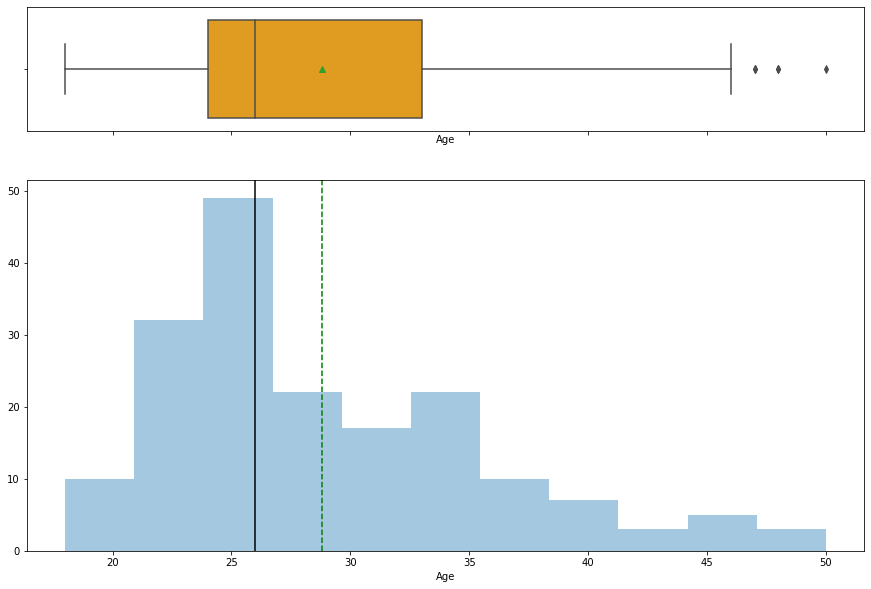

In [58]:
#Histograms and box plots are very similar in that they both help to visualize and describe numeric data.
histogram_boxplot(df.Age)

**Observations**  
    1.Majority of the Age groups are close to 25.  
    3.Average Age group is ~ 28.  
    4.Few Outliers in this variable are observed  
    5.Most products are purchased by age group close to 23 to 26

### Observation on Education.

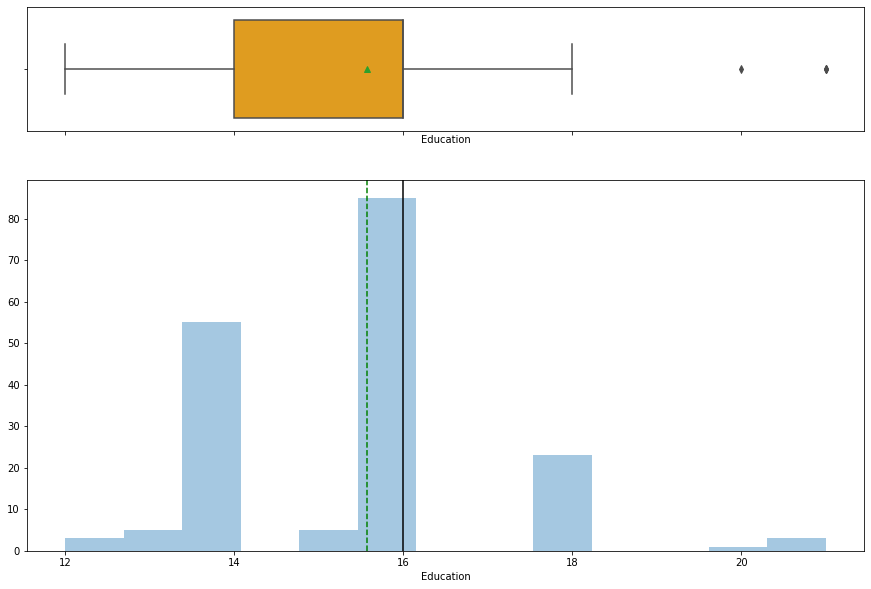

In [18]:
histogram_boxplot(df.Education)

**Observation**  
    1.Education is left skewed.  
    2.50% of customers have 14- 16 years of education   
    3.few customers with education 20 years or  above exhibit abnormality 
    

### Observation on Usage.

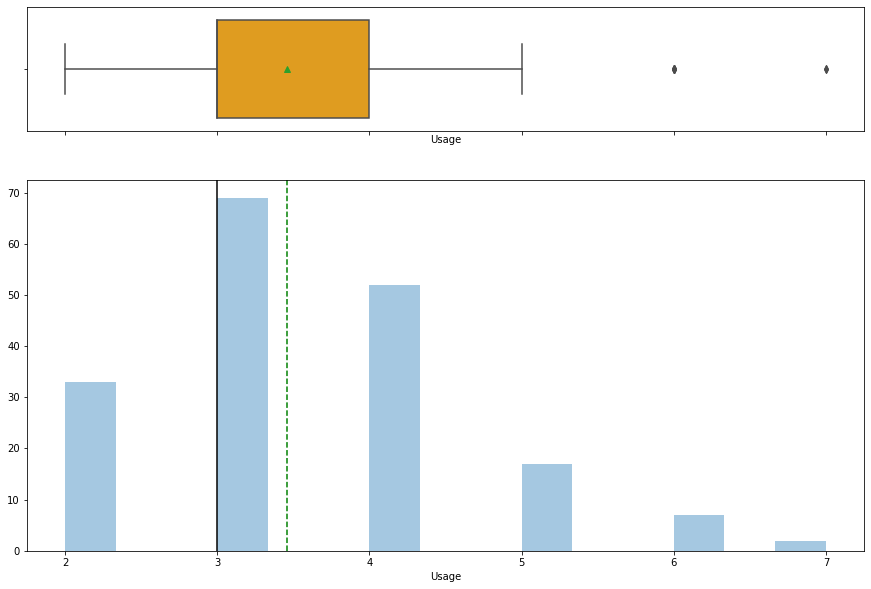

In [19]:
histogram_boxplot(df.Usage)

**Observation**    
    1.we observe few customers with higher Usage, we get outliers.  
    2.We know that customers with less usage  have purchased the more thread mills.

### Observation on Fitness.

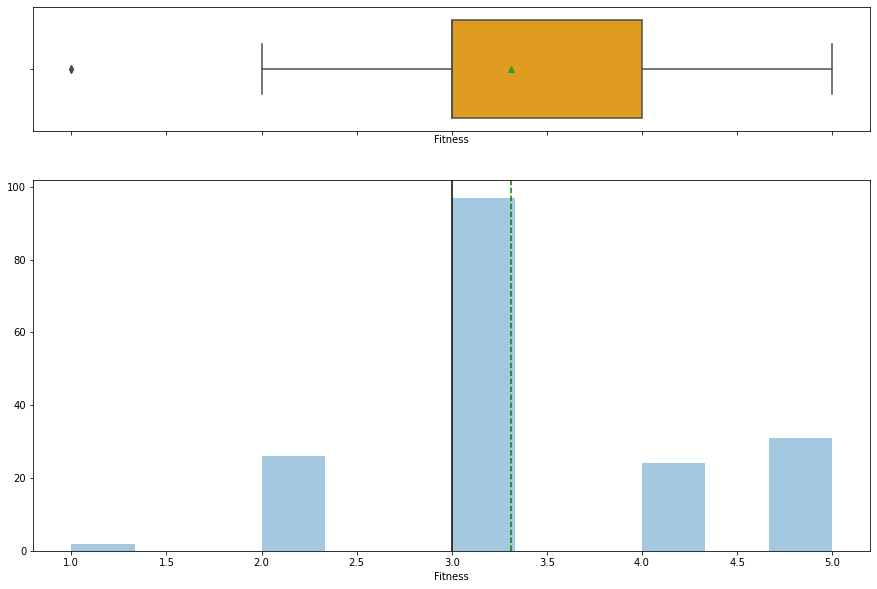

In [20]:
histogram_boxplot(df.Fitness)

**Observation**  
    1.More customers have purchased with average fitness score   
    2.customers with less fitness score exhibit abnormality  

### Observation on Income.

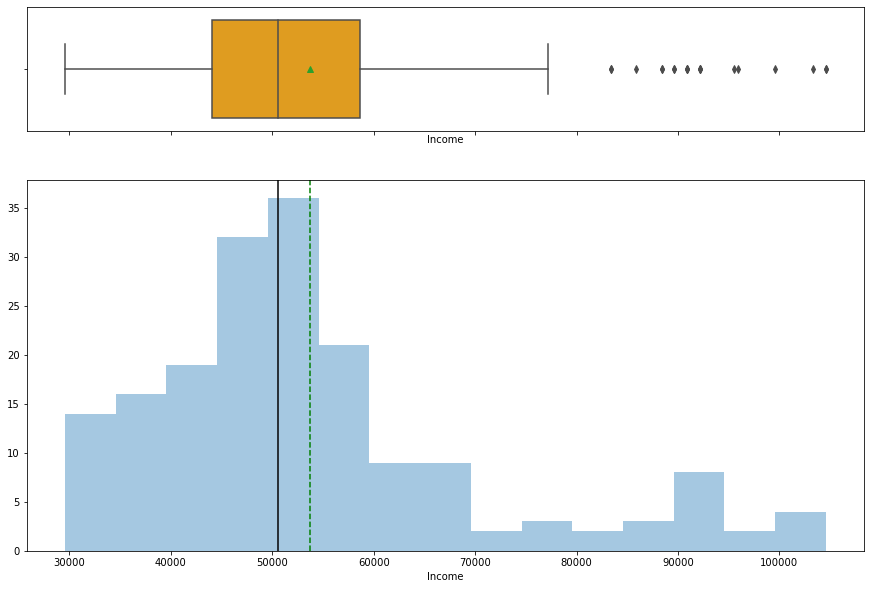

In [21]:
histogram_boxplot(df.Income)

**Observation**  
    1. We do observe customers with higher income observe outliers.  
    2. More products are purchased by Average income customers.  

### Observation on Miles.

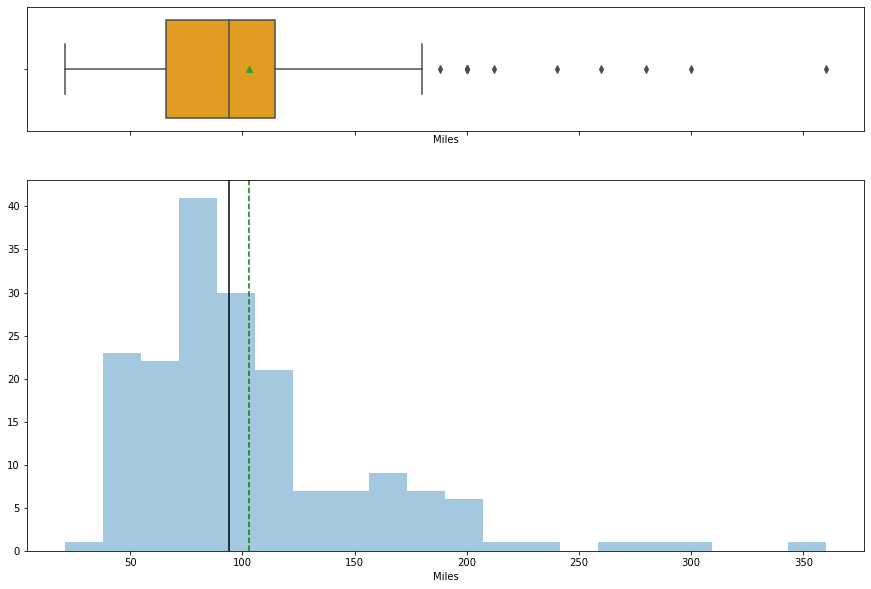

In [22]:
histogram_boxplot(df.Miles)

**Observations**  
    1. We do observe, customer with higher miles, we get outliers.  
    2. Most of the customers run close to average miles.
    
    
    

#  Let us explore the categorical variables now

In [23]:
# Function to create barplots that indicate percentage for each category.
def bar_perc(plot, feature):
    '''
    plot
    feature: 1-d categorical feature array
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage

# Observations on Product

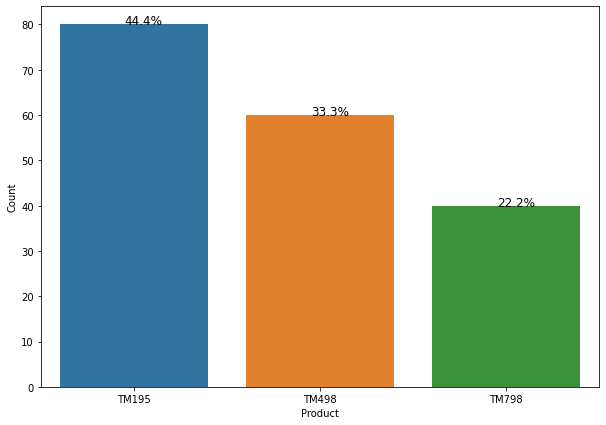

In [66]:
plt.figure(figsize=(10,7))
ax = sns.countplot(df['Product'])
plt.xlabel('Product')
plt.ylabel('Count')
bar_perc(ax,df['Product'])

**Observations**  
    1.TM195 models are highly purchased by the customers.  
    2.TM798 models are least ourchased.  

# **Observations on Gender**

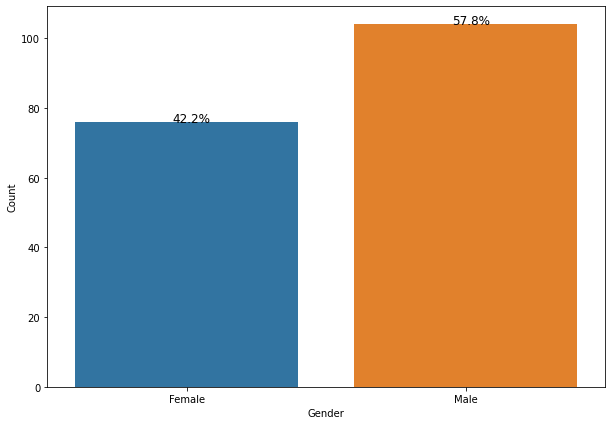

In [25]:
plt.figure(figsize=(10,7))
ax = sns.countplot(df['Gender'])
plt.xlabel('Gender')
plt.ylabel('Count')
bar_perc(ax,df['Gender'])

**Observationns**  
    1. More males have puchased the Threadmill.

# **Observations on MaritalStatus**

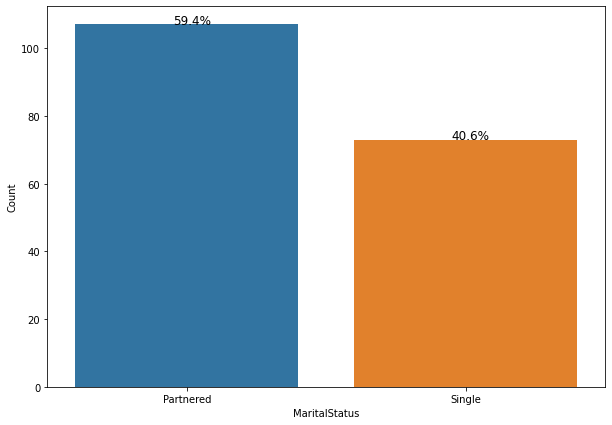

In [26]:
plt.figure(figsize=(10,7))
ax = sns.countplot(df['MaritalStatus'])
plt.xlabel('MaritalStatus')
plt.ylabel('Count')
bar_perc(ax,df['MaritalStatus'])

**Observations**  
    1. Customers with Partnered maritalstatus have purchased the most.

###  Bivariate Analysis
   **Plot bivariate charts between variables to understand their interaction with each other.**

In [27]:
# Check for the Correlation among numerical variables
corr=df.corr()
corr

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


<AxesSubplot:>

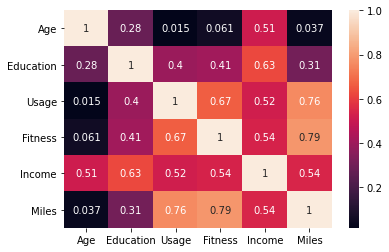

In [28]:
# Plot the heatmap
sns.heatmap(corr,annot=True)

**Observation**  
1.As expected ,Income  shows high correlation with dewpoint.  
2.There seem to be strong relationship is observed between below variables:  

(0.4) - Usage & Education: customers who uses the products more frequently got  higher education level.    
(0.41) - Fitness & Education.:A fit customer has higher education.  
(0.52) - Usage & Income: High usage customers  lean more towards high income.  
(0.54) - Fitness & Income.: Fitter customers mostly got high income.  
(0.54) - Income & Miles:Higher income customers are  expected to run more miles.  
(0.63) - Income & Education:Higher income customers are highly  educated.  
(0.67) - Fitness & Usage: fitter customers are highly expected to use the product more.  
(0.76) - Usage & Miles:Customers with high usage are highly expected run more.  
(0.79) - Fitness & Miles.:This means a fitter customers are expected to run more miles.  

In [68]:
# creating dataframe for the product TM195
df_TM195= df[df['Product']=='TM195']
df_TM195


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
75,TM195,43,Male,16,Partnered,3,3,53439,66
76,TM195,44,Female,16,Single,3,4,57987,75
77,TM195,46,Female,16,Partnered,3,2,60261,47
78,TM195,47,Male,16,Partnered,4,3,56850,94


**Observation**  
Data frame sucessfully created for the product TM195

In [70]:
# Check for the Correlation among numerical variables
corr_TM195=df_TM195.corr()
corr_TM195

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.336268,-0.015342,0.054469,0.751831,-0.064632
Education,0.336268,1.000000,0.169369,0.111379,0.446551,0.111956
Usage,-0.015342,0.169369,1.000000,0.468825,-0.052227,0.645576
Fitness,0.054469,0.111379,0.468825,1.000000,0.005906,0.826177
Income,0.751831,0.446551,-0.052227,0.005906,1.000000,-0.039377
Miles,-0.064632,0.111956,0.645576,0.826177,-0.039377,1.000000


<AxesSubplot:>

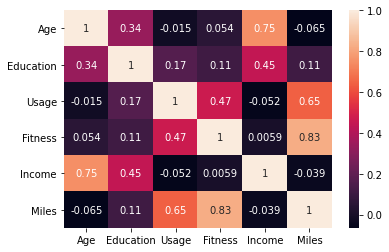

In [71]:
# Plot the heatmap
sns.heatmap(corr_TM195,annot=True)

**Observations**  
A highly positive correlation is observed between:  
(0.45) - Income & Education:Higher income customers are moderately high educated.  
(0.47) - Fitness & Usage: fitter customers are  moderately using the product more.  
(0.65) - Usage & Miles:Customers with high usage are highly expected run more.  
(0.83) - Fitness & Miles.:This means a fitter customers are expected to run more miles.  
(0.47) - Fitness & Usage: Fitter customers tend to use the products more  


In [73]:
df_TM195.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,80,80.000000,80,80.000000,80,80.000000,80.00000,80.00000,80.000000
unique,1,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM195,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,40,NaN,48,NaN,NaN,NaN,NaN
mean,NaN,28.550000,NaN,15.037500,NaN,3.087500,2.96250,46418.02500,82.787500
std,NaN,7.221452,NaN,1.216383,NaN,0.782624,0.66454,9075.78319,28.874102
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.00000,29562.00000,38.000000
25%,NaN,23.000000,NaN,14.000000,NaN,3.000000,3.00000,38658.00000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.00000,46617.00000,85.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,3.00000,53439.00000,94.000000


**Observations**  
Products are purchased by customers whose Age falls between 18 to 50.  
Product is more popular among the mens with the frequency of 40.  
Products purchased by customer have education level between 12-18.  
Products are mostly purchased by Partnered Marital-status with a frequency of 48.  
Purchased product is used with in range of 2to 5 times per week.  
Customers Fitness score rates between  1 to 5.  
Customers purchased the product whose Income is between 29562 to 68220 is observed.  
Customer are estimated to run 38-188 miles.  

In [76]:
# Median calculation of TM195 
df_TM195.median(axis = 0) 

Age             26.0
Education       16.0
Usage            3.0
Fitness          3.0
Income       46617.0
Miles           85.0
dtype: float64

In [77]:
# dataframe created for the TM498 product
df_TM498= df[df['Product']=='TM498']
df_TM498

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
80,TM498,19,Male,14,Single,3,3,31836,64
81,TM498,20,Male,14,Single,2,3,32973,53
82,TM498,20,Female,14,Partnered,3,3,34110,106
83,TM498,20,Male,14,Single,3,3,38658,95
84,TM498,21,Female,14,Partnered,5,4,34110,212
85,TM498,21,Male,16,Partnered,2,2,34110,42
86,TM498,21,Male,12,Partnered,2,2,32973,53
87,TM498,23,Male,14,Partnered,3,3,36384,95
88,TM498,23,Male,14,Partnered,3,3,38658,85
89,TM498,23,Female,16,Single,3,3,45480,95


In [78]:
# Correlation calculation
corr_TM498=df_TM498.corr()
corr_TM498

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.472956,-0.078458,-0.026730,0.787550,-0.124710
Education,0.472956,1.000000,-0.112105,-0.094660,0.540207,-0.240293
Usage,-0.078458,-0.112105,1.000000,0.349996,0.073367,0.673648
Fitness,-0.026730,-0.094660,0.349996,1.000000,-0.008086,0.676894
Income,0.787550,0.540207,0.073367,-0.008086,1.000000,-0.054691
Miles,-0.124710,-0.240293,0.673648,0.676894,-0.054691,1.000000


<AxesSubplot:>

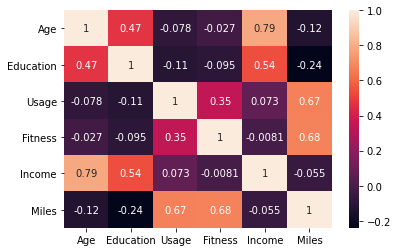

In [81]:
# Plot the heatmap
sns.heatmap(corr_TM498,annot=True)

**Observations**  
A highly positive correlation is observed between:    
(0.54) - Income & Education:Higher income customers are highly  educated.  
(0.35) - Fitness & Usage: fitter customers are moderately use the product more.  
(0.67) - Usage & Miles:Customers with high usage are highly expected run more.  
(0.68) - Fitness & Miles.:This means a fitter customers are expected to run more miles.  

In [80]:
df_TM498.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,60,60.000000,60,60.000000,60,60.000000,60.00000,60.000000,60.000000
unique,1,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM498,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,60,NaN,31,NaN,36,NaN,NaN,NaN,NaN
mean,NaN,28.900000,NaN,15.116667,NaN,3.066667,2.90000,48973.650000,87.933333
std,NaN,6.645248,NaN,1.222552,NaN,0.799717,0.62977,8653.989388,33.263135
min,NaN,19.000000,NaN,12.000000,NaN,2.000000,1.00000,31836.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.00000,44911.500000,64.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.00000,49459.500000,85.000000
75%,NaN,33.250000,NaN,16.000000,NaN,3.250000,3.00000,53439.000000,106.000000


**Observations**  
Products are purchased by customers whose Age falls between 19 to 48.  
Product is more popular among the mens with the frequency of 31.  
Products purchased by customer have education level between 12-18.  
Products are mostly purchased by Partnered Marital-status with a frequency of 36.  
Purchased product is used with in range of 2to 5 times per week.  
Customers Fitness score rates between  1 to 4.  
Customers purchased the product whose Income is between 31836 to 67083 is observed.  
Customer are estimated to run 21-212 miles.  

In [84]:
#Median calculation for TM498 product
df_TM498.median(axis = 0) 

Age             26.0
Education       16.0
Usage            3.0
Fitness          3.0
Income       49459.5
Miles           85.0
dtype: float64

In [85]:
#Dataframe created for TM798
df_TM798= df[df['Product']=='TM798']
df_TM798

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
140,TM798,22,Male,14,Single,4,3,48658,106
141,TM798,22,Male,16,Single,3,5,54781,120
142,TM798,22,Male,18,Single,4,5,48556,200
143,TM798,23,Male,16,Single,4,5,58516,140
144,TM798,23,Female,18,Single,5,4,53536,100
145,TM798,23,Male,16,Single,4,5,48556,100
146,TM798,24,Male,16,Single,4,5,61006,100
147,TM798,24,Male,18,Partnered,4,5,57271,80
148,TM798,24,Female,16,Single,5,5,52291,200
149,TM798,24,Male,16,Single,5,5,49801,160


In [87]:
# Calculation of correlation for the TM798 product
corr_TM798=df_TM798.corr()
corr_TM798

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.167617,0.120007,0.212141,0.713489,0.243106
Education,0.167617,1.000000,-0.017758,-0.166991,0.252306,-0.228587
Usage,0.120007,-0.017758,1.000000,0.228182,0.281543,0.503106
Fitness,0.212141,-0.166991,0.228182,1.000000,0.110507,0.391083
Income,0.713489,0.252306,0.281543,0.110507,1.000000,0.309289
Miles,0.243106,-0.228587,0.503106,0.391083,0.309289,1.000000


<AxesSubplot:>

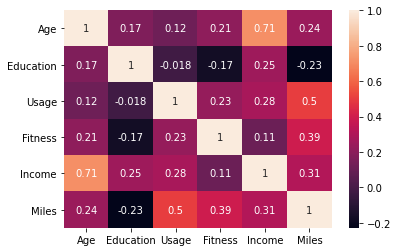

In [89]:
# Plot the heatmap
sns.heatmap(corr_TM798,annot=True)

**Observations**  
A highly positive correlation is observed between:  
(0.25) - Income & Education: Very few Higher income customers are highly  educated.  
(0.35) - Fitness & Usage: fitter customers are moderately use the product more.  
(0.5) - Usage & Miles:Customers with high usage are highly expected run more.  
(0.39) - Fitness & Miles.:This means fewer fitter customers are expected to run more miles.  
(0.31) - Income & Miles: This means fewer high income customers run moderate miles.  


In [91]:
df_TM798.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,40,40.000000,40,40.000000,40,40.000000,40.000000,40.00000,40.000000
unique,1,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM798,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,40,NaN,33,NaN,23,NaN,NaN,NaN,NaN
mean,NaN,29.100000,NaN,17.325000,NaN,4.775000,4.625000,75441.57500,166.900000
std,NaN,6.971738,NaN,1.639066,NaN,0.946993,0.667467,18505.83672,60.066544
min,NaN,22.000000,NaN,14.000000,NaN,3.000000,3.000000,48556.00000,80.000000
25%,NaN,24.750000,NaN,16.000000,NaN,4.000000,4.000000,58204.75000,120.000000
50%,NaN,27.000000,NaN,18.000000,NaN,5.000000,5.000000,76568.50000,160.000000
75%,NaN,30.250000,NaN,18.000000,NaN,5.000000,5.000000,90886.00000,200.000000


**Observations**  
Products are purchased by customers whose Age falls between 22 to 48.  
Product is more popular among the mens with the frequency of 33.  
Products purchased by customer have education level between 14-21.  
Products are mostly purchased by Partnered Marital-status with a frequency of 23.  
Purchased product is used with in range of 3to 7 times per week.  
Customers Fitness score rates between  3 to 5.  
Customers purchased the product whose Income is between 48556 to 104581 is observed.  
Customer are estimated to run 80-360 miles. 

In [93]:
# calculation of median for TM798
df_TM798.median(axis = 0) 

Age             27.0
Education       18.0
Usage            5.0
Fitness          5.0
Income       76568.5
Miles          160.0
dtype: float64

# **Bivariate Scatter Plots**

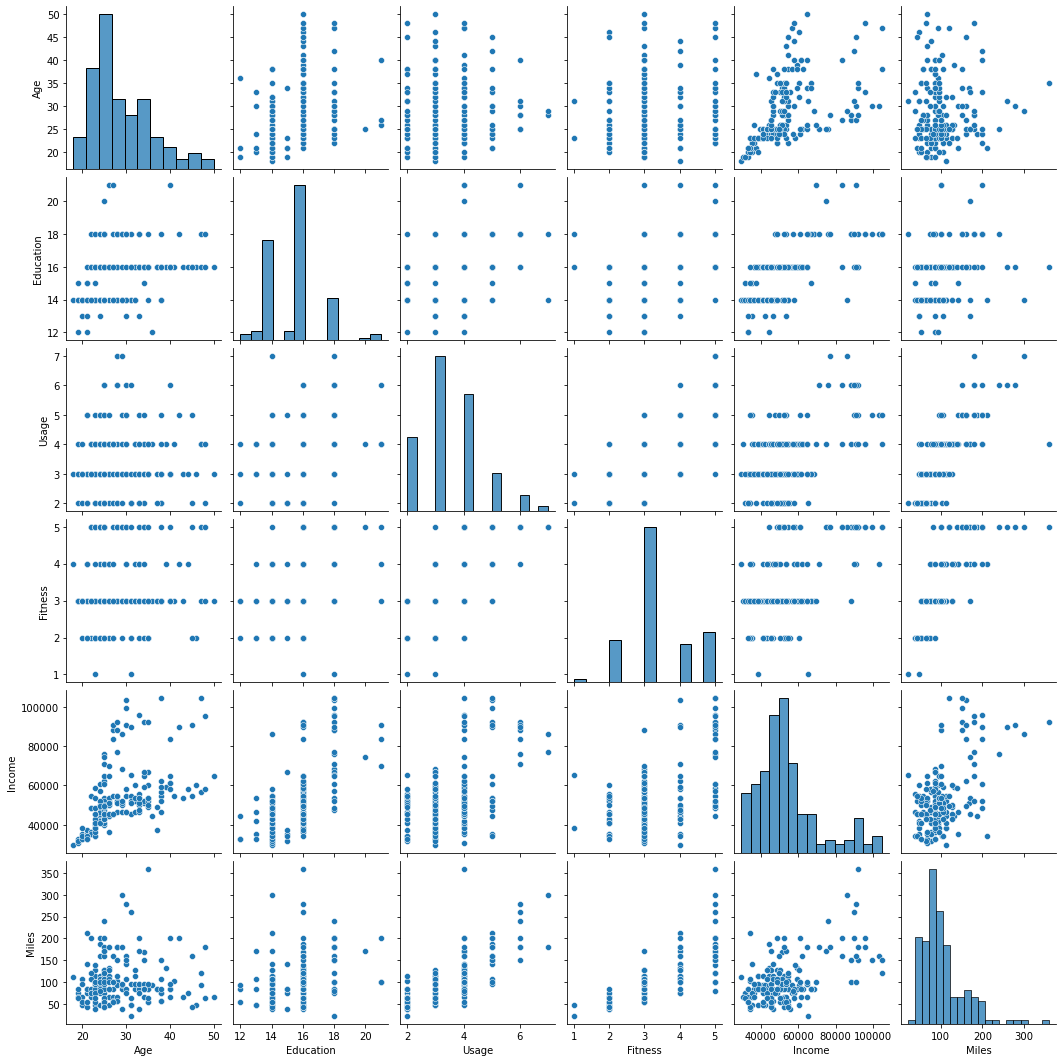

In [44]:
sns.pairplot(df)

**Observation**  
    1.we get the same observation as from the correlation plot of df.   
    2.There does not seem to have strong relationship betwwen Usage and Age   
    3.There does not seem to have strong relationship betwwen Fitness and Age  
    

# Relationship between catagorical variables

In [94]:
# displays columns values
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

<AxesSubplot:xlabel='Product', ylabel='count'>

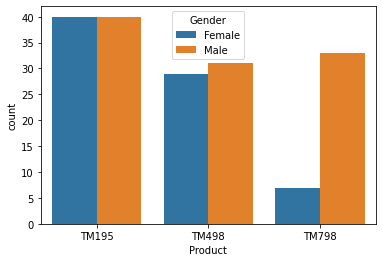

In [96]:
sns.countplot(x='Product',hue='Gender',data=df)

**Observations**  
Males are highly popular with all models  
TM195 has both genders equally 
TM498 has not much significant difference in genders  
TM798 is mostly purchased by Men  

<AxesSubplot:xlabel='Product', ylabel='count'>

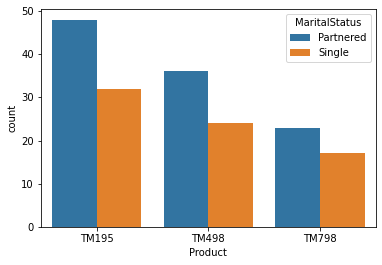

In [97]:
sns.countplot(x='Product',hue='MaritalStatus',data=df)

**Observations**  
Partnered status customers are more in all three products


# Group box plot 


Text(0.5, 0, 'Age')

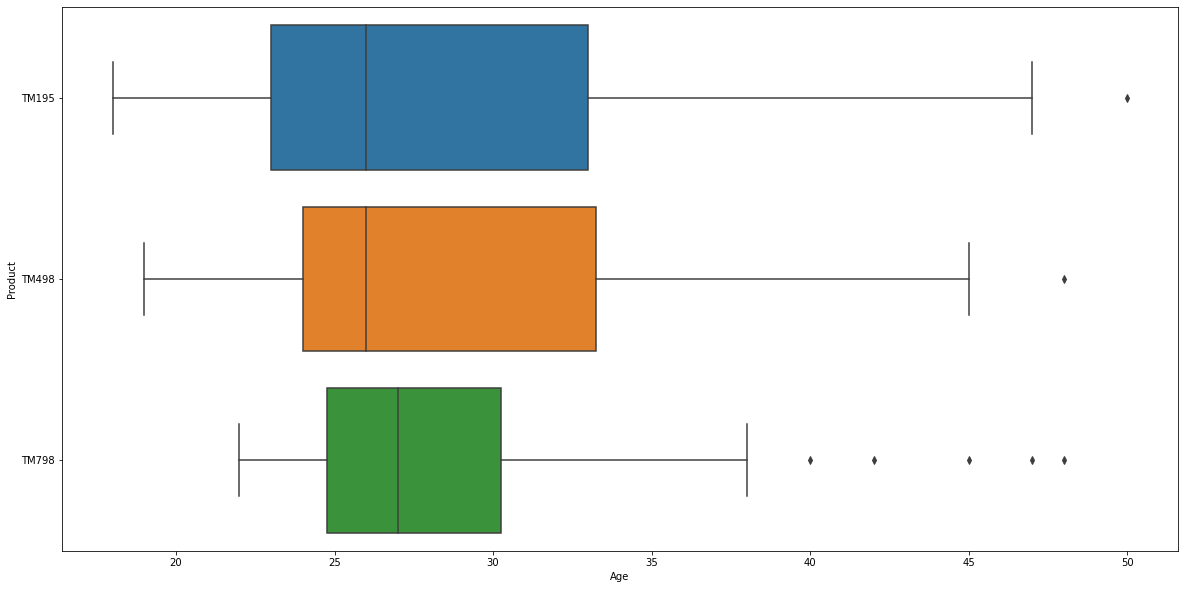

In [48]:
plt.figure(figsize=(20,10))           
sns.boxplot(df['Age'],df['Product'])
plt.ylabel('Product')
plt.xlabel('Age')

**Observations**  

1.Customers with TM195 models  are popular among age group between 23 to 33.   
 
2.Customers with TM195 models among age group > 48 exhibit outliers.  
  
3.Customers with TM498 models are popular among age group between 24 to 33.    

4.Customers with TM498 models with age range > 45 exhibit outliers.   
 
5.Customers with TM798 models are popular among age group between 24 to 30.   
 
6.Customers with TM798 models with age range > 38 exhibit outliers. 

7.All the three models are popular among the young customers and less 
  traffic is observed with the middle age customers.

Text(0.5, 0, 'Education')

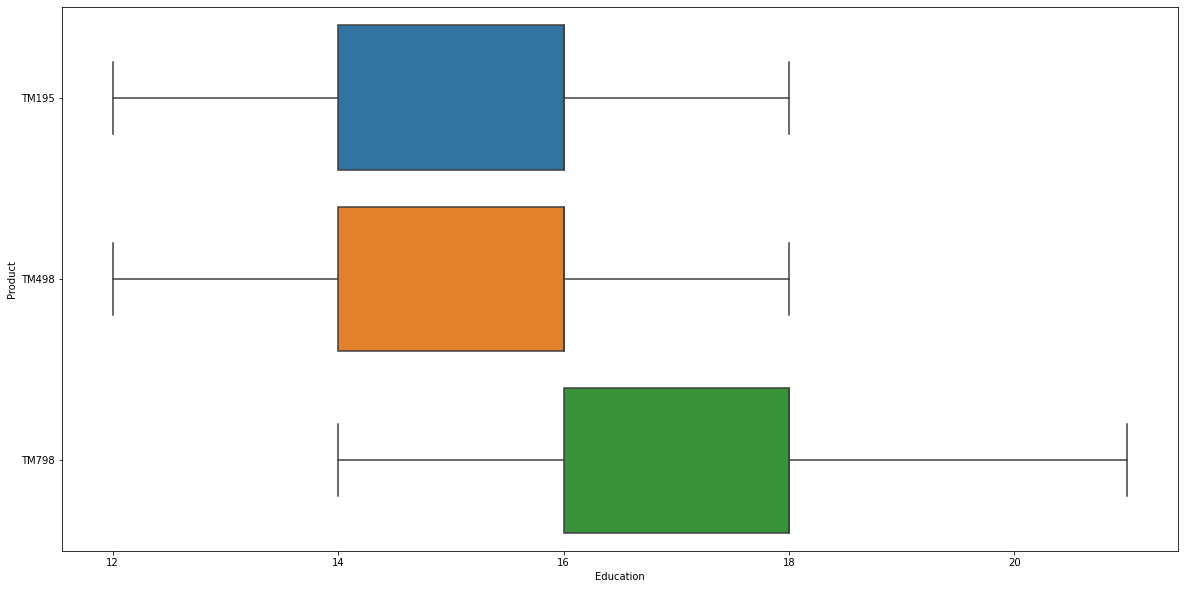

In [49]:
plt.figure(figsize=(20,10))           
sns.boxplot(df['Education'],df['Product'])
plt.ylabel('Product')
plt.xlabel('Education')

**Observation**  
1.Customers who purchased TM195 and TM498 is popular  among less educated people ranging from 14 to 16.    
2.Cu.stomers who purchased TM798 is popular among Higher educated customers ranging from 16 to 18.  
3. Product vs Education plot show not a big difference between Customers  

Text(0.5, 0, 'Income')

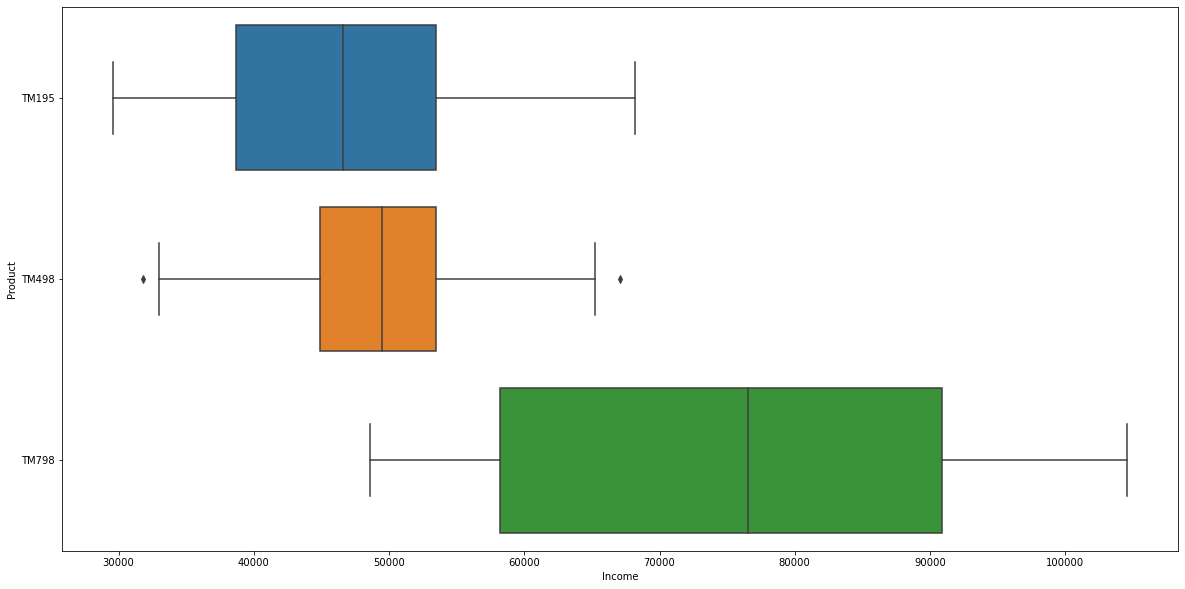

In [50]:
plt.figure(figsize=(20,10))           
sns.boxplot(df['Income'],df['Product'])
plt.ylabel('Product')
plt.xlabel('Income')

**Observation**  
1.Customers who purchased TM195 have income range between 39000 to 55000.  
2.Customers who purchased TM498 have income range between 48000 to 55000.  
3.Customers who purchased TM798 have income range between 59000 to 91000.  
4.Customers who brought TM195 and TM498 models targets the low to medium income customers.  
5.Customers who brought TM798 targets the higher income customers.  
6.Significant difference in customers between TM798 vs TM195, TM498 is observed.  

Text(0, 0.5, 'Fitness')

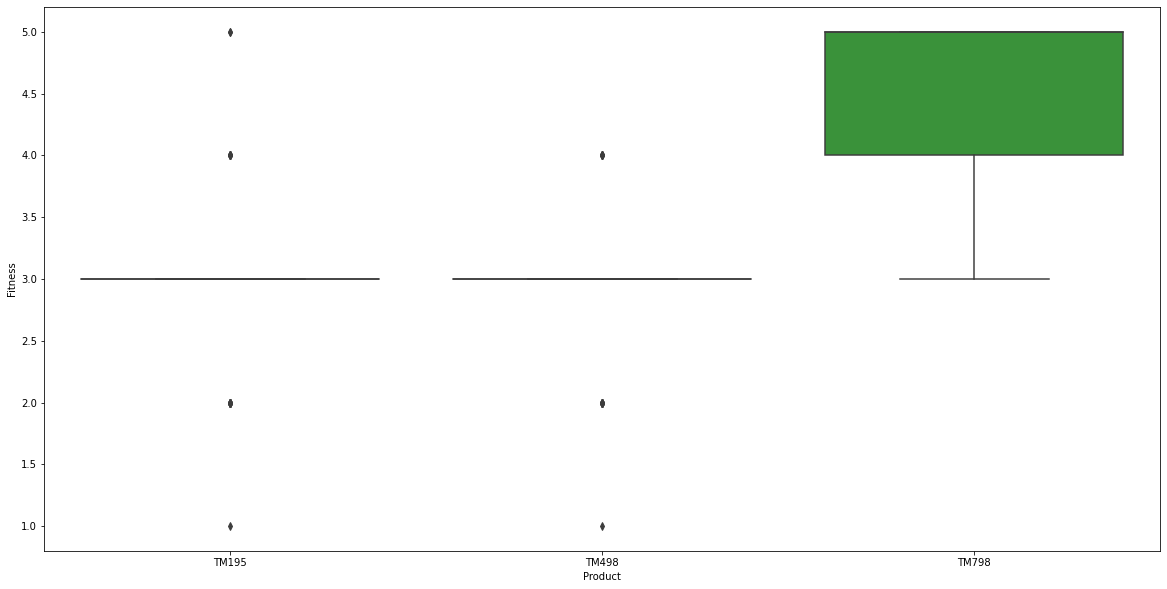

In [51]:
plt.figure(figsize=(20,10))           
sns.boxplot(df['Product'],df['Fitness'])
plt.xlabel('Product')
plt.ylabel('Fitness')

**Observation**  
1.Customers with TM195 & TM498  product exhibit abnormalities when fitness score ranges between 1 to 5 & 1 to 4.  
2.There is no particular pattern for customers who purchased TM195 & TM498 models.  
3.Customers with TM798 product have a fitness score ranges between 4 to 5.  
4.Customers holding  TM798 are more fitter then customers with TM195 & TM498.  

Text(0, 0.5, 'Usage')

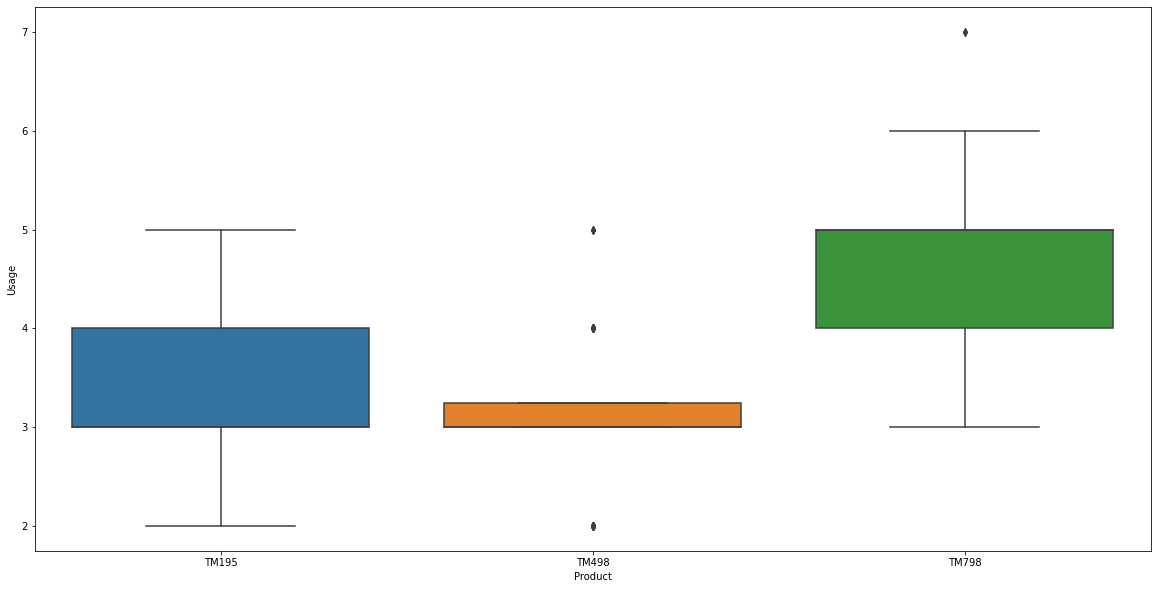

In [52]:
plt.figure(figsize=(20,10))           
sns.boxplot(df['Product'],df['Usage'])
plt.xlabel('Product')
plt.ylabel('Usage')

**Observation**  
1.Customers with TM195 uses the product 3-4 times a week.  
2.Customers with TM498 uses the product 3- 3.3 times a week.  
3.Customer with TM798 uses the product 4-5 times a week.  
4.TM498 Customers use the product less frequently than TM798 product and the followed by TM195.
5.TM798 customers use it more fequently than other models.


Text(0, 0.5, 'Miles')

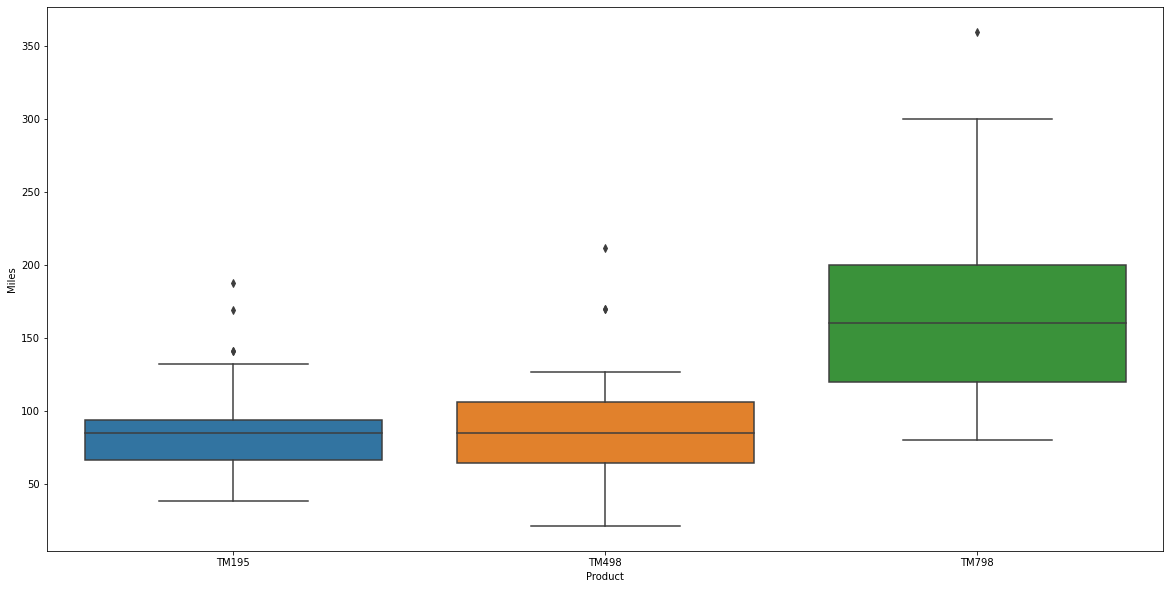

In [53]:
plt.figure(figsize=(20,10))           
sns.boxplot(df['Product'],df['Miles'])
plt.xlabel('Product')
plt.ylabel('Miles')

**Observation**  
1.Customers who purchased TM195 are expected to run miles ranging between  75 to 95.    

2.Customers who purchased TM478 are expected to run miles ranging between  75 to 105.    

3.Customers who purchased TM798 are expected to run miles ranging between  120 to 200.    

4.Customers who purchased TM195 are exhibit outliers when expected to run miles is > 140    

5.Customers who purchased TM478 exhibit outliers when expected to run miles is > 175    

6.Customers who purchased TM798 exhibit outliers when expected to run miles is > 350  
7.TM798 Customers run more miles than other customers who brought TM498 and TM195.  

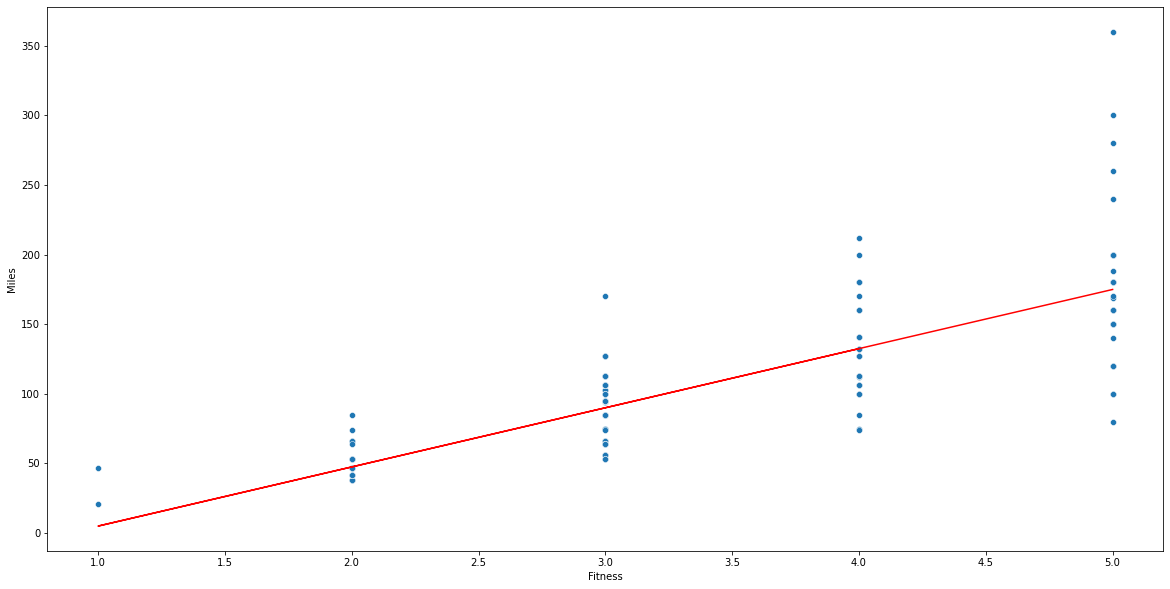

In [54]:
# Scatter plot between Fitness and miles.
#Polyfit generates the coefficients of the polynomial, which can be used to model a curve to fit the data.
#Trade line displays Plot the fitted line over the specified range.

plt.figure(figsize=(20,10))           
sns.scatterplot(df['Fitness'],df['Miles'])
plt.xlabel('Fitness')
plt.ylabel('Miles')
x = df['Fitness']
y = df['Miles']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r-")

plt.show()

**Observation**  
1.Customers whose fitness score ranges between 4-5 are expected to run more miles(50to 200miles) per week.  
2.Customers with higher fitness score   exhibit abnormality or less traffic when the miles per week>120 and 200 or miles < 90 and 100.  
3.Overall Fitter the customer, higher the number of miles.  

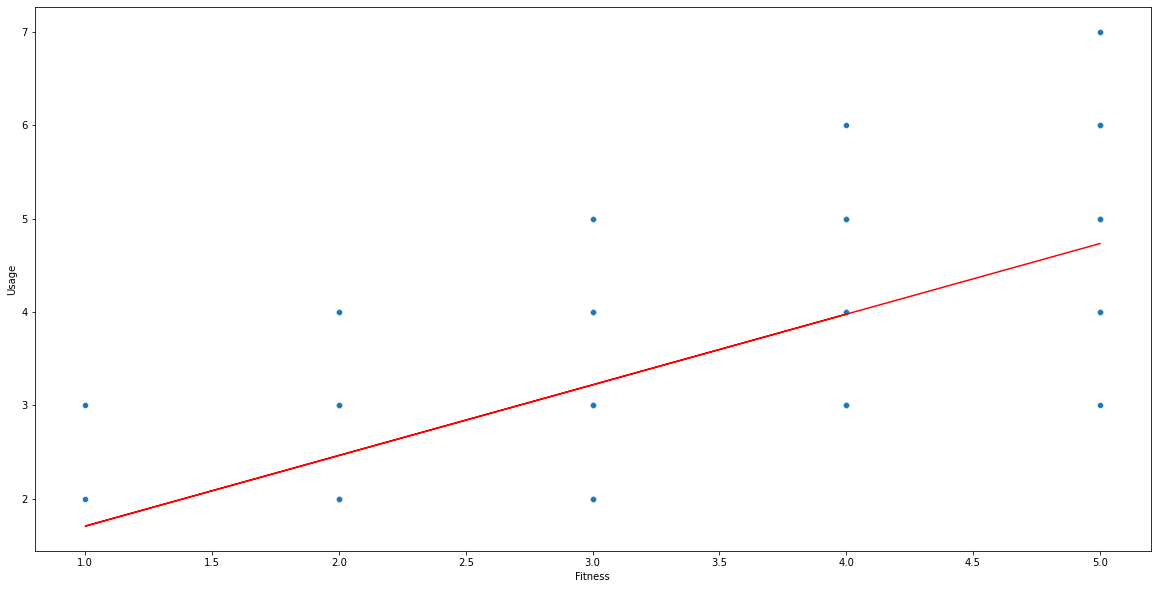

In [55]:
# Scatter plot between Fitness and Usage.
#Polyfit generates the coefficients of the polynomial, which can be used to model a curve to fit the data.
#Trade line displays Plot the fitted line over the specified range.

plt.figure(figsize=(20,10))           
sns.scatterplot(df['Fitness'],df['Usage'])
plt.xlabel('Fitness')
plt.ylabel('Usage')
x = df['Fitness']
y = df['Usage']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r-")

plt.show()

**Observation**  
Higher fitness score of the customers are highly expected to use the product more.



# Conclusion 

****  
OverAll, conclusion is based on the limited set of data provided.

TM195:

TM195 model is popular among the customers and their customers are equally split between both genders and the age bracket is lies between 18-50 years old. Their Income range is between 29562$- 68220$ which targets low to medium income buyers and  education level rates between 12 to 18.They have a average fitness of 3, and a broad variation in the usage per week, range is between from 2 times to 5 times a week. 
On average, buyers plan to run minimum each time they use the product. 

TM498 :
 
Model does not have significant difference and  likely have small enhancement from TM195 in terms of features and price.
Over all buyers liked product but not as popular as TM195.Customer base does not have big significant difference between genders and age bracket lies between 19- 48.
The minimum income is slightly higher than TM195 and maximum income is same as TM195, which targets the low to medium income buyers.Education range is similar to TM195  and customer tend to use it at the lower end ranging between 3-4 times a week.
On average, buyers plan to run slightly more each time they use the treadmill.

TM798:

Model has a distinct customer profile  from TM195 and TM498. More male customers tend to lean more towards this product as per the data, male to female ratio is 5:1.The Fitness is  range is slightly at the higher end.i.e, 3-5 and 5 is  (the highest possible rating),.
on average buyer plan to use the treadmill per week is 5 and their income range is relatively at the higher end 
Their education is  ranging between 14-21 years, and have average income of $76568.5 — which is 1.5 times that of the buyers of TM195 and TM49.
On average  number of miles they intend to run is 160 miles, that is twice the average of TM195 and TM498 buyers.






###  Recommendations:
As Per the analysis, interestingly partnered customers are more likely to buy a treadmill across all three products and the ratio of partnered customers to single customers is approximately 1:1.4 across all products.

Customers who wants it for high usage and intending to put more miles per week likely to buy across all the products,  since customers show relatively high positive correlation value between usage and miles.

Male Customers can be recommended with T798 model since the ratio between female to Male is approximately 1:5. 

Customers are more likely to buy TM195 and TM498 products and as the  average income of  customers who bought TM195 and TM498  fall in low- medium income customers. These products can be recommended to individuals.

There is a huge scope for the all three products by focusing on new target markets like  Corporate offices, apartments agencies, Startup companies, weight loss agencies.This can optimize the demand and supply followed by profits  and more customers.